In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [5]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [ ]:
df = pd.read_csv(csv_path)
df = df[5::6]
df = df[["p (mbar)","T (degC)"]]
df.head()



In [25]:
n = len(df)

train_df = df[:int(0.8*n)]
test_df = df[int(0.8*n):]
print(train_df.shape)
print(test_df.shape)

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


(56072, 2)
(14019, 2)


In [55]:
def make_data(data, lag = 24, offset = 1, target_col = 1):
    X = []
    y = []
    for i in range(len(data) - lag - offset):
        X.append(data[i:i+lag,:])
        y.append(data[i+lag + offset - 1,target_col])

    return np.array(X), np.array(y)

In [56]:
lag = 24
offset = 24
target_col = 1
n_features = train_df.shape[1]
X_train, y_train = make_data(train_df.values, lag = lag, offset=offset,target_col=target_col)
X_test, y_test = make_data(train_df.values, lag = lag, offset=offset,target_col=target_col)


In [62]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(64, input_shape = (lag,n_features), recurrent_dropout=0.1))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(period))

In [63]:
model.compile(optimizer="adam",loss= "mse",metrics=["mape"])
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1246/1751 [====================>.........] - ETA: 11s - loss: 0.1863 - mape: 232.1850

KeyboardInterrupt: ignored

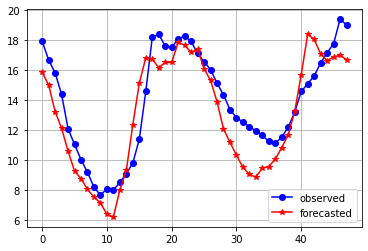

In [61]:
ypred = model.predict(X_test)

plt.plot(y_test[-48:] * train_std[1] + train_mean[1], "-ob", label = "observed")
plt.plot(ypred[-48:] * train_std[1] + train_mean[1], "-*r", label = "forecasted")
plt.grid()
plt.legend()